In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from pytz import timezone
import pytz

In [2]:
dataset = pd.read_csv('SolarPrediction.csv')
dataset = dataset.sort_values(['UNIXTime'], ascending = [True])
print(dataset.shape)
dataset.head()

(32686, 11)


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7416,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
7415,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
7414,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
7413,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
7412,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [3]:
h_timezone= timezone('Pacific/Honolulu')
dataset.index =  pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset.index = dataset.index.tz_localize(pytz.utc).tz_convert(h_timezone)
dataset['MonthOfYear'] = dataset.index.strftime('%m').astype(int)
dataset['DayOfYear'] = dataset.index.strftime('%j').astype(int)
dataset['WeekOfYear'] = dataset.index.strftime('%U').astype(int)
dataset['Hour'] = dataset.index.hour
dataset['Month'] = dataset.index.month
dataset['Date'] = dataset.index.date
dataset['TimeSunRise'] = pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S').dt.time
dataset['TimeSunSet'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S').dt.time
dataset['Total_time'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S').dt.hour

<Axes: xlabel='Temperature', ylabel='Density'>

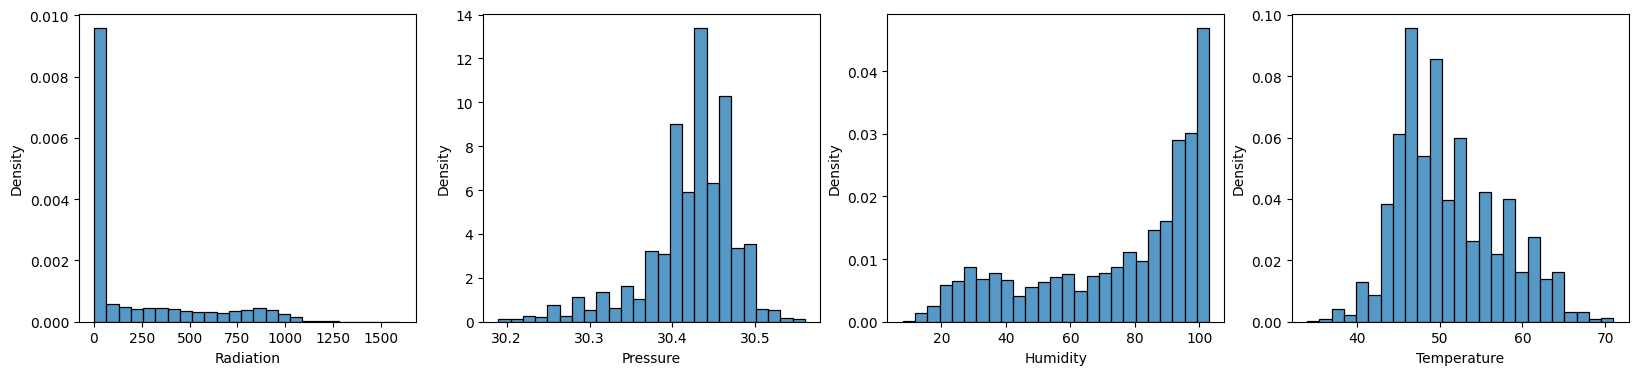

In [4]:
figure, axis = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(dataset['Radiation'], stat="density", bins=25, ax=axis[0])
sns.histplot(dataset['Pressure'], stat="density", bins=25, ax=axis[1])
sns.histplot(dataset['Humidity'], stat="density", bins=25, ax=axis[2])
sns.histplot(dataset['Temperature'], stat="density", bins=25, ax=axis[3])

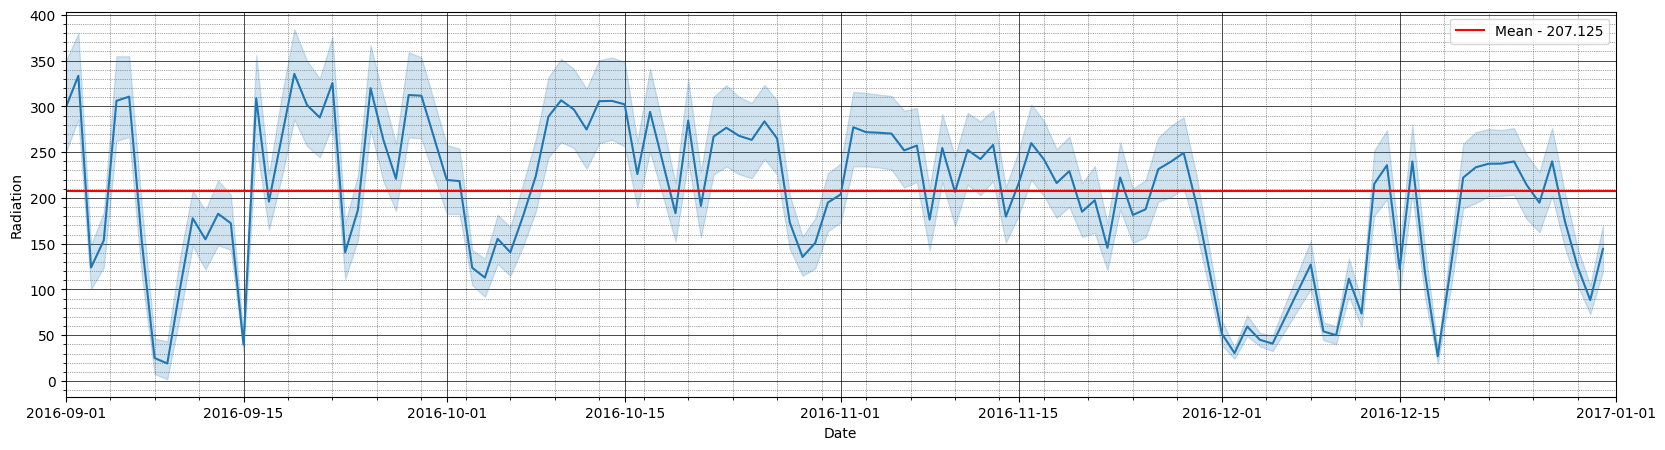

In [5]:
figure, axis = plt.subplots(figsize=(20, 5))
sns.lineplot(data=dataset, x="Date", y ="Radiation")

radiation_mean_avg = dataset['Radiation'].mean()
axis.axhline(radiation_mean_avg, color='red', linestyle='-', label=f"Mean - {radiation_mean_avg:.3f}")
axis.set_axisbelow(True)
axis.minorticks_on()
axis.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
axis.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)
axis.set_xlim([datetime(2016,9,1), datetime(2017,1,1)])

axis.legend();

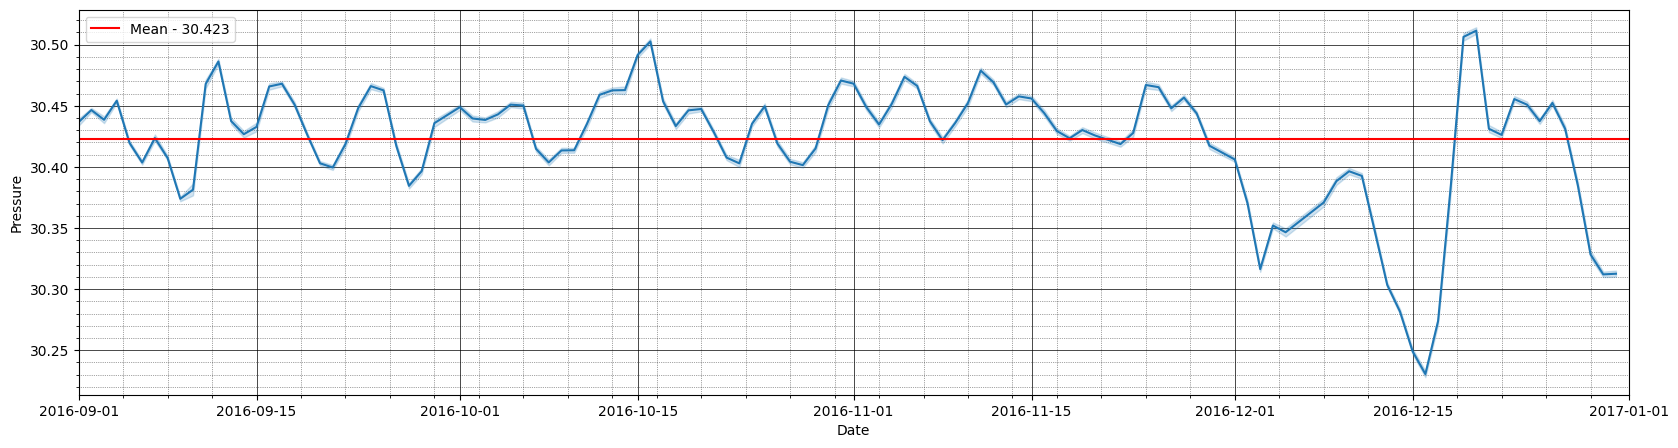

In [6]:
figure, axis = plt.subplots(figsize=(20, 5))
sns.lineplot(data=dataset, x="Date", y="Pressure")

pressure_mean_avg = dataset['Pressure'].mean()
axis.axhline(pressure_mean_avg, color='red', linestyle='-', label=f"Mean - {pressure_mean_avg:.3f}")
axis.set_axisbelow(True)
axis.minorticks_on()
axis.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
axis.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)
axis.set_xlim([datetime(2016,9,1), datetime(2017,1,1)])

axis.legend();

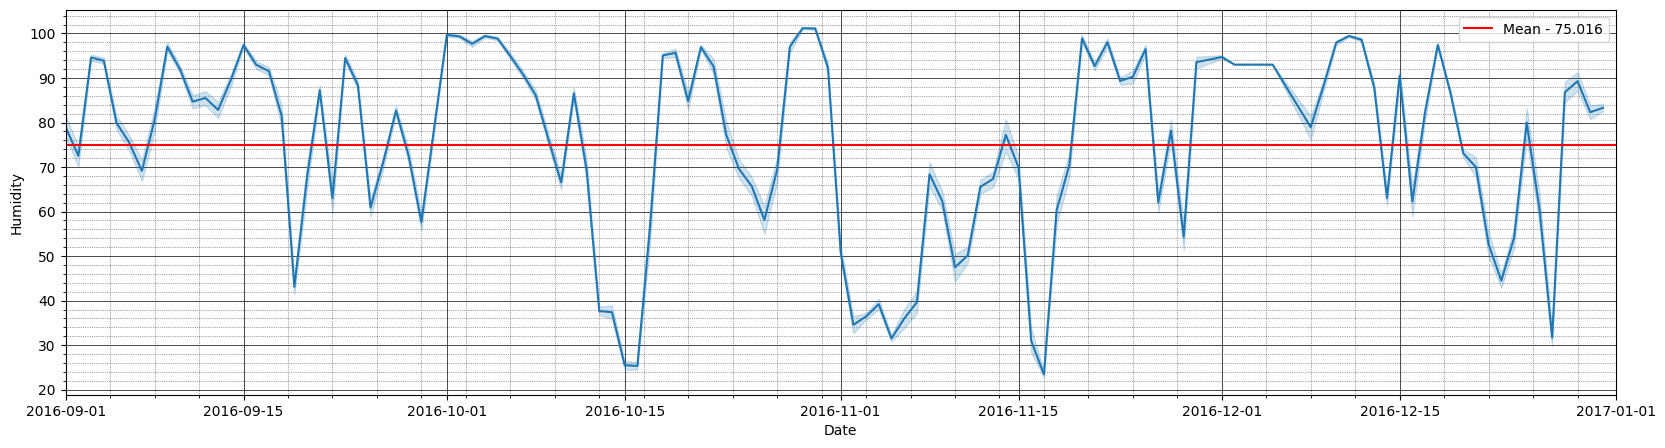

In [7]:
figure, axis = plt.subplots(figsize=(20, 5))
sns.lineplot(data=dataset, x="Date", y="Humidity")

humidity_mean_avg = dataset['Humidity'].mean()
axis.axhline(humidity_mean_avg, color='red', linestyle='-', label=f"Mean - {humidity_mean_avg:.3f}")
axis.set_axisbelow(True)
axis.minorticks_on()
axis.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
axis.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)
axis.set_xlim([datetime(2016,9,1), datetime(2017,1,1)])

axis.legend();

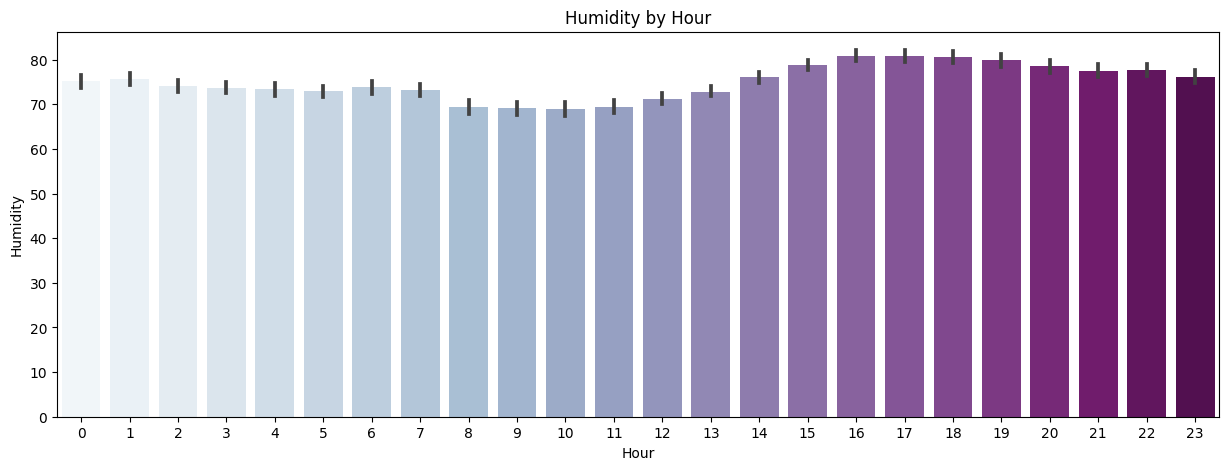

In [8]:
figure, axis = plt.subplots(figsize=(15, 5))
sns.barplot(x="Hour", y='Humidity', data=dataset, palette=("BuPu"))
axis.set_title('Humidity by Hour');

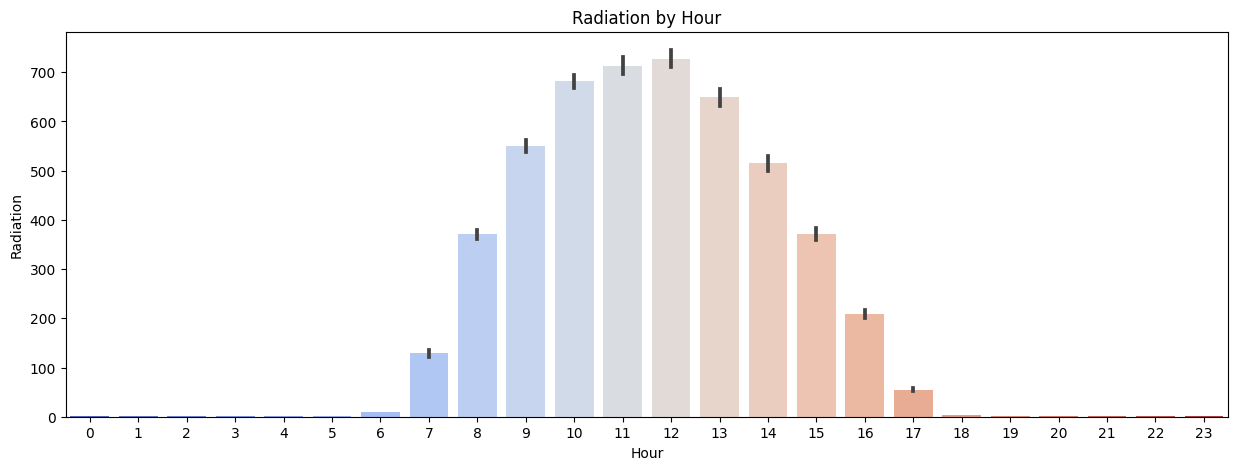

In [9]:
figure, axis = plt.subplots(figsize=(15, 5))
sns.barplot(x="Hour", y='Radiation', data=dataset, palette="coolwarm")
axis.set_title('Radiation by Hour');

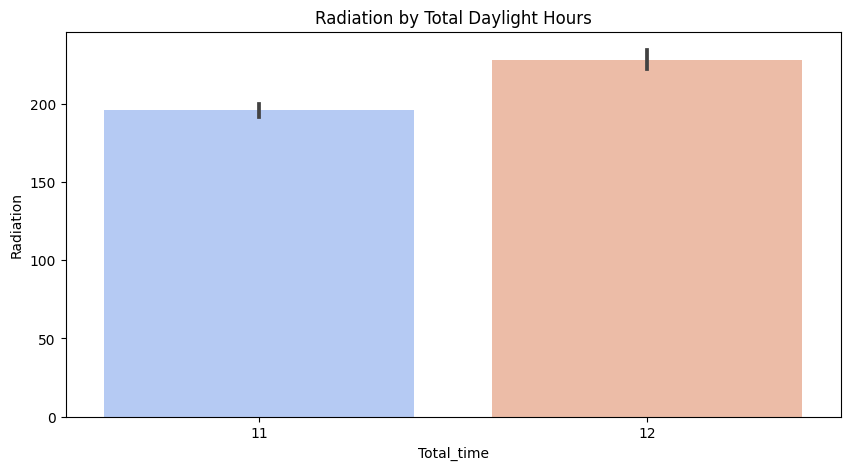

In [10]:
figure, axis = plt.subplots(figsize=(10, 5))
sns.barplot(x="Total_time", y='Radiation', data=dataset, palette="coolwarm")
axis.set_title('Radiation by Total Daylight Hours');

In [11]:
print(dataset.columns)

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet', 'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'Hour', 'Month',
       'Date', 'Total_time'],
      dtype='object')


In [12]:
x = dataset[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'Total_time']]
y = dataset['Radiation']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import max_error, r2_score

In [15]:
all_models=[("Linear Regression", LinearRegression()),
            ("Gradient Boosting", GradientBoostingRegressor()),
            ("KNeighbors", KNeighborsRegressor()),
            ("Extra Trees", ExtraTreesRegressor()),
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor())]

In [16]:
models_score = {'r2': 'r2',
                'mean_absolute_error': 'neg_mean_absolute_error',
                'mean_squared_error': 'neg_mean_squared_error',
           'root_mean_squared_error': 'neg_root_mean_squared_error', 
           'max_error': 'max_error'}

In [17]:
model_data=[]
for model_name, model in all_models:
    model_result = cross_validate(model, x_train, y_train, cv=10, scoring=models_score)
    model_data.append({'model':model_name, 'score':model_result})

In [18]:
models_performance = {'model':[], 'r2':[], 'mae':[], 'mse':[], 'rmse':[], 'me':[]}

for data in model_data:   
    models_performance['model'].append(data['model'])
    models_performance['r2'].append(np.abs(data['score']['test_r2'].mean())*100)
    models_performance['mae'].append(np.abs(data['score']['test_mean_absolute_error'].mean()))
    models_performance['mse'].append(np.abs(data['score']['test_mean_squared_error'].mean()))
    models_performance['rmse'].append(np.abs(data['score']['test_root_mean_squared_error'].mean()))
    models_performance['me'].append(np.abs(data['score']['test_max_error'].mean()))
    
print(f"models -> {models_performance['model']}")
print(f"r2 -> {models_performance['r2']}")
print(f"mae -> {models_performance['mae']}")
print(f"mse -> {models_performance['mse']}")
print(f"rmse -> {models_performance['rmse']}")
print(f"me -> {models_performance['me']}")

models -> ['Linear Regression', 'Gradient Boosting', 'KNeighbors', 'Extra Trees', 'Decision Tree', 'Random Forest']
r2 -> [59.97863723310116, 74.81405938805632, 71.19710606832773, 88.19558732922587, 76.40490552966425, 87.6704434924199]
mae -> [149.53664634387198, 99.63823154885701, 92.57901940060947, 53.269687623118486, 66.37047886708964, 56.15024964703927]
mse -> [39555.49141900496, 24885.050308777452, 28496.139930495876, 11674.873938832492, 23323.516602753865, 12188.67659281537]
rmse -> [198.83615350619317, 157.68990239436965, 168.72205368129306, 107.94073943482769, 152.5363225734607, 110.32242707646951]
me -> [926.6081091759794, 876.3702611589626, 993.8226000000001, 898.6188799999998, 1129.92, 853.2431499999999]


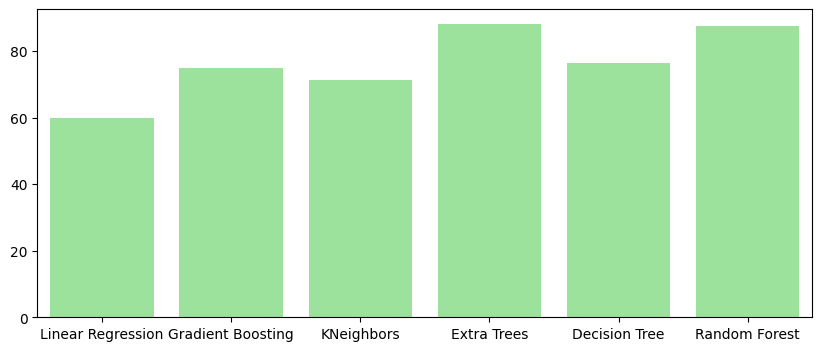

In [19]:
figure, axis = plt.subplots(figsize=(10, 4))
sns.barplot(x="model", y='r2', data=models_performance, color="lightgreen");

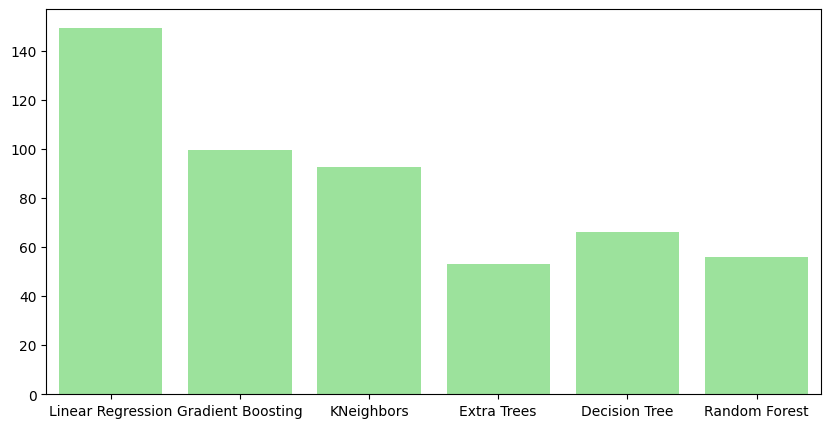

In [20]:
figure, axis = plt.subplots(figsize=(10, 5))
sns.barplot(x="model", y='mae', data=models_performance, color="lightgreen");

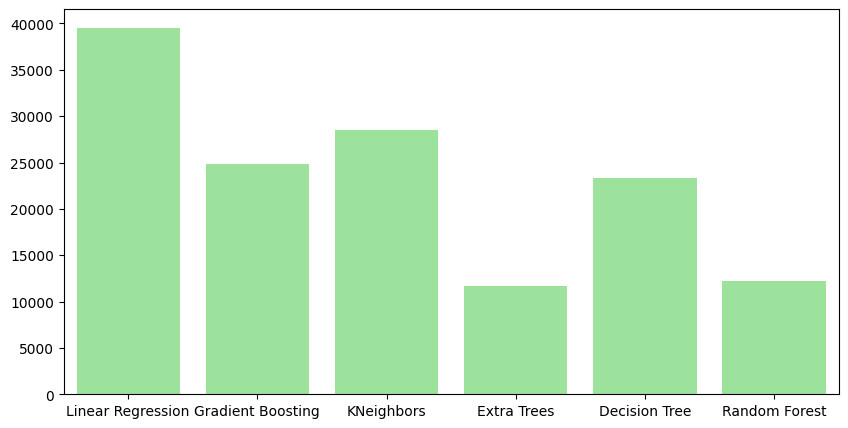

In [21]:
figure, axis = plt.subplots(figsize=(10, 5))
sns.barplot(x="model", y='mse', data=models_performance, color="lightgreen");

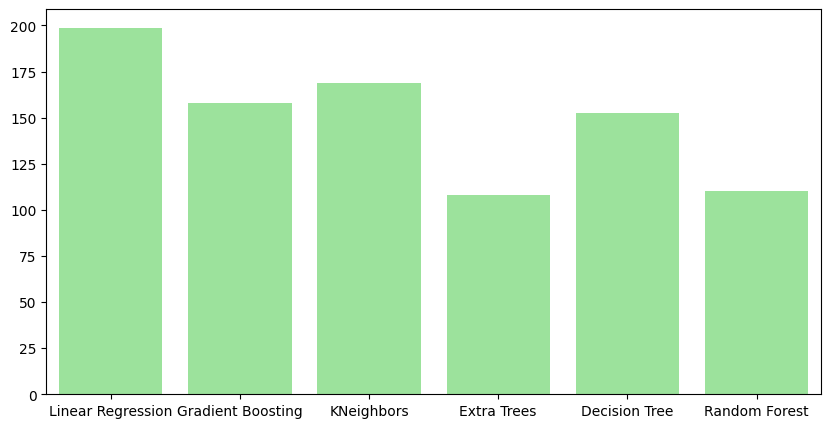

In [22]:
figure, axis = plt.subplots(figsize=(10, 5))
sns.barplot(x="model", y='rmse', data=models_performance, color="lightgreen");

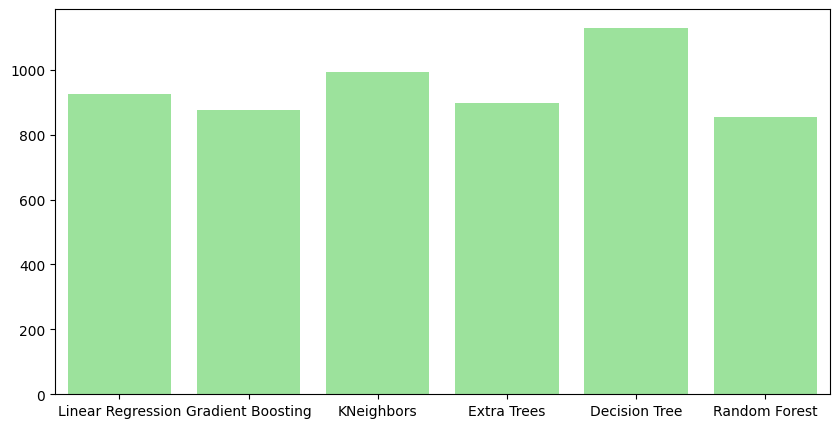

In [23]:
figure, axis = plt.subplots(figsize=(10, 5))
sns.barplot(x="model", y='me', data=models_performance, color="lightgreen");